# Datos Desbalanceados

Crear entorno virtual

In [ ]:
%python -m venv ./venv

Activar entorno virtual

In [ ]:
%.\venv\Scripts\activate

Instalar dependencias

In [ ]:
%pip install ipykernel numpy pandas matplotlib seaborn scikit-learn imblearn

Importar dependencias

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los datos con los que trabajaremos.

In [43]:
df = pd.read_csv('Credit.csv')
df.head()

,age,job,marital,education,balance,housing,duration,campaign,approval
0,30.0,unemployed,married,primary,1787,no,79.0,1,no
1,33.0,services,married,secondary,4789,yes,220.0,1,no
2,35.0,management,single,tertiary,1350,yes,185.0,1,no
3,30.0,management,married,tertiary,1476,yes,199.0,4,no
4,59.0,blue-collar,married,secondary,0,yes,226.0,1,no


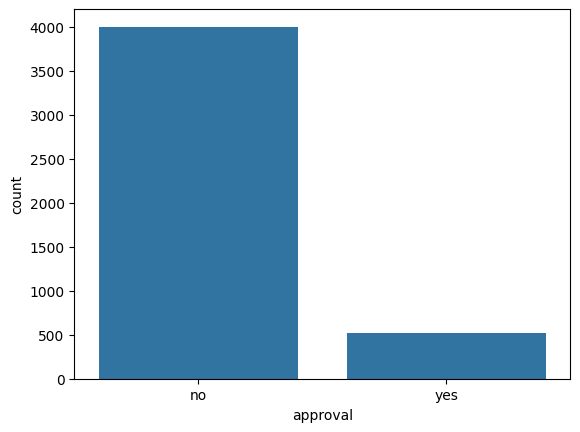

In [4]:
sns.countplot(
    data = df,
    x = 'approval'
)
plt.show()

## Datos Desbalanceados

Los datos desequilibrados se refieren a aquellos tipos de conjuntos de datos donde la clase objetivo tiene una distribución desigual de observaciones, es decir, una etiqueta de clase tiene una cantidad muy alta de observaciones y la otra tiene una cantidad muy baja de observaciones.

Supongamos que XYZ es un banco que emite tarjetas de crédito a sus clientes. Ahora, al banco le preocupa que se estén produciendo algunas transacciones fraudulentas; cuando el banco verifica sus datos descubre que por cada 2000 transacciones solo se registran 30 transacciones correspondientes a fraude. Por lo tanto, el número de fraude por cada 100 transacciones es inferior al 2%, o podemos decir que más del 98% de las transacciones son de naturaleza "No Fraude". Aquí, la clase "Sin fraude" se denomina clase mayoritaria, y la clase "Fraude", mucho más pequeña, se denomina clase minoritaria.

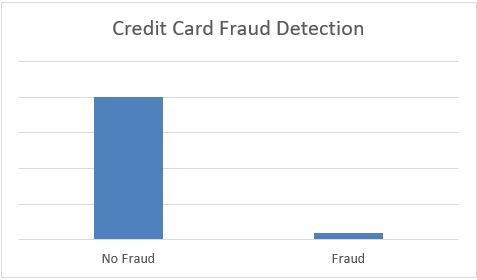

El desbalanceo de datos es normal en los problemas de clasificación.

## Problema del Desbalanceo de Datos

El principal problema con la predicción en conjuntos de datos desequilibrados es: ¿con qué precisión predecimos realmente tanto la clase mayoritaria como la minoritaria? Veamos el siguiente ejemplo con el diagnóstico de una enfermedad. Supongamos que vamos a predecir la enfermedad a partir de un conjunto de datos existente donde por cada 100 registros solo se diagnostica la enfermedad a 5 pacientes. Entonces, la clase mayoritaria es el 95% (sin enfermedad) y la clase minoritaria es sólo el 5% (con la enfermedad). Ahora, supongamos que nuestro modelo predice que 100 de 100 pacientes no tienen ninguna enfermedad.

A veces, cuando los registros de una determinada clase son muchos más que los de otra clase, nuestro clasificador puede estar sesgado en la predicción. Si calculamos el Accuracy del modelo obtenemos: (0+95)/(0+95+0+5)=0,95 o 95%. Significa que el modelo no logra identificar la clase minoritaria, pero la puntuación de Accuracy del modelo es de 95%.

Por lo tanto, nuestro enfoque tradicional de clasificación y cálculo de la precisión del modelo no es útil en el caso de un conjunto de datos desequilibrado.

## Trabajando con Datos Desbalanceados

### Escoger la métrica adecuada

- Precision/Especificidad: cuántas instancias seleccionadas son relevantes.
- Recall/Sensibilidad: cuántas instancias relevantes se seleccionan.
- F1 Score: media armónica de precisión y recuperación.
- MCC: coeficiente de correlación entre las clasificaciones binarias observadas y predichas.
- AUC: relación entre tasa de verdaderos positivos y tasa de falsos positivos.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('Credit.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop('approval', axis=1)
y = df['approval']

# Define the categorical features to be encoded
categorical_features = ['job', 'marital', 'education', 'housing']

# Create a column transformer to encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ])

# Create the logistic regression model
model = LogisticRegression()

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.89      1.00      0.94       807
         yes       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905



d:\anaconda3\envs\datosDesbalanceados\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\datosDesbalanceados\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\datosDesbalanceados\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resampling/Remuestreo

Consiste en quitar muestras de la clase mayoritaria (Undersampling) y/o añadir más ejemplos de la clase minoritaria (Oversampling).

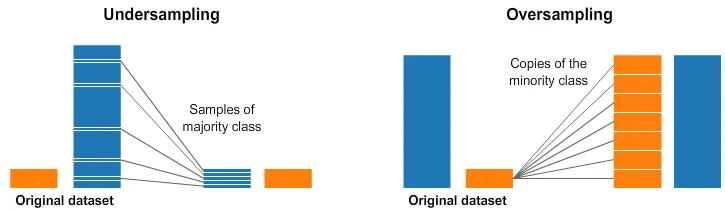

#### Oversampling con Scikit-learn

In [4]:
from sklearn.utils import resample

In [5]:
# Load the dataset
df = pd.read_csv('Credit.csv')

In [6]:
#create two different dataframe of majority and minority class 
df_majority = df[df['approval']=='no'] 
df_minority = df[df['approval']=='yes'] 

In [7]:
# upsample minority class
df_minority_upsampled = resample(
    df_minority, 
    # sample with replacement
    replace=True,    
    # match majority class
    n_samples= df_majority.shape[0], 
    random_state=42
)  

In [8]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [9]:
df_upsampled['approval'].value_counts()

approval
yes    4000
no     4000
Name: count, dtype: int64

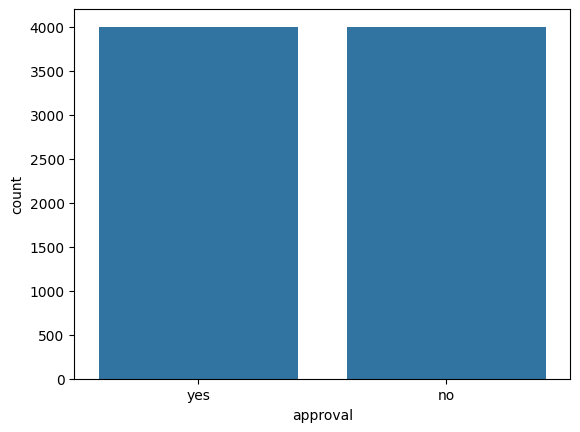

In [12]:
sns.countplot(
    data = df_upsampled,
    x = 'approval'
)
plt.show()

In [13]:
# Split the dataset into features (X) and target variable (y)
X = df_upsampled.drop('approval', axis=1)
y = df_upsampled['approval']

# Define the categorical features to be encoded
categorical_features = ['job', 'marital', 'education', 'housing']

# Create a column transformer to encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ])

# Create the logistic regression model
model = LogisticRegression()

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.58      0.63      0.60       796
         yes       0.60      0.55      0.58       804

    accuracy                           0.59      1600
   macro avg       0.59      0.59      0.59      1600
weighted avg       0.59      0.59      0.59      1600



#### Undersampling con Scikit-learn

In [58]:
from sklearn.utils import resample

In [59]:
# Load the dataset
df = pd.read_csv('Credit.csv')

In [60]:
#create two different dataframe of majority and minority class 
df_majority = df[df['approval']=='no'] 
df_minority = df[df['approval']=='yes'] 

In [61]:
# downsample minority class
df_majority_downsample = resample(
    df_majority, 
    # sample with replacement
    replace=True,    
    # match minority class
    n_samples=df_minority.shape[0], 
    random_state=42
)  

In [62]:
# Combine minority class with downsample majority class 
df_downsampled = pd.concat([df_majority_downsample, df_minority])

In [63]:
df_downsampled['approval'].value_counts()

approval
no     521
yes    521
Name: count, dtype: int64

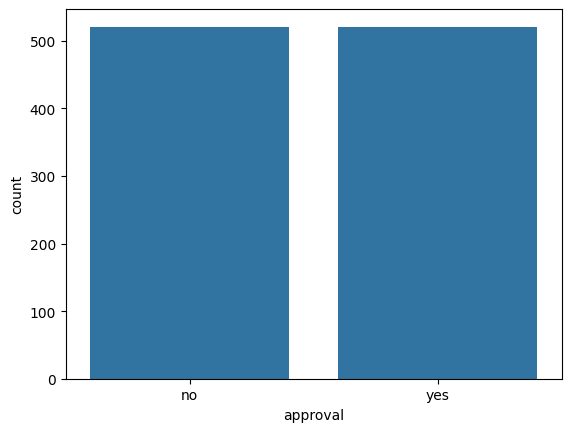

In [64]:
sns.countplot(
    data = df_downsampled,
    x = 'approval'
)
plt.show()

In [65]:
df_downsampled.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df_downsampled.drop('approval', axis=1)
y = df_downsampled['approval']

# Define the categorical features to be encoded
categorical_features = ['job', 'marital', 'education', 'housing']

# Create a column transformer to encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ])

# Create the logistic regression model
model = LogisticRegression()

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.56      0.63      0.59       103
         yes       0.59      0.51      0.55       105

    accuracy                           0.57       208
   macro avg       0.57      0.57      0.57       208
weighted avg       0.57      0.57      0.57       208



#### Undersampling usando Cluster Centroid

In [76]:
from imblearn.under_sampling import ClusterCentroids

In [77]:
df = pd.read_csv('Credit.csv')

In [78]:
df.dropna(inplace=True)

In [79]:
X = df.drop('approval', axis=1)
y = df['approval']

In [80]:
X = pd.get_dummies(X)

In [81]:
cc = ClusterCentroids(sampling_strategy='majority', random_state=42)
underSampled_X, underSampled_Y = cc.fit_resample(X, y)
undersampled = pd.concat([pd.DataFrame(underSampled_Y), pd.DataFrame(underSampled_X)], axis=1)

d:\anaconda3\envs\datosDesbalanceados\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
undersampled['approval'].value_counts()

approval
no     519
yes    519
Name: count, dtype: int64

In [83]:
# Split the dataset into features (X) and target variable (y)
X = undersampled.drop('approval', axis=1)
y = undersampled['approval']

# Create the logistic regression model
model = LogisticRegression()

# Create a pipeline with the model
pipeline = Pipeline(steps=[('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.86      0.87      0.86       102
         yes       0.88      0.86      0.87       106

    accuracy                           0.87       208
   macro avg       0.87      0.87      0.87       208
weighted avg       0.87      0.87      0.87       208



#### Oversampling con SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
df = pd.read_csv('Credit.csv')

In [95]:
sm = SMOTE( random_state=42)

In [96]:
df.dropna(inplace=True)

In [97]:
X = df.drop('approval', axis=1)
y = df['approval']

In [98]:
X = pd.get_dummies(X)

In [99]:
oversampled_X, oversampled_Y = sm.fit_resample(X, y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [100]:
oversampled['approval'].value_counts()

approval
no     3982
yes    3982
Name: count, dtype: int64

In [101]:
# Split the dataset into features (X) and target variable (y)
X = oversampled.drop('approval', axis=1)
y = oversampled['approval']

# Create the logistic regression model
model = LogisticRegression()

# Create a pipeline with the model
pipeline = Pipeline(steps=[('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.54      0.14      0.23       808
         yes       0.50      0.87      0.63       785

    accuracy                           0.50      1593
   macro avg       0.52      0.51      0.43      1593
weighted avg       0.52      0.50      0.43      1593

